# TODO:

- add MLD data to merged dataframe
- plot individual data
- plot correlations

In [2]:
library(tidyverse, warn.conflicts = FALSE)

# library to read matlab data formats into R
library(reshape2)
library(lubridate)

# set strings as factors to false
options(stringsAsFactors = FALSE)

In [7]:
cor(wind_niskin[-3,])

ERROR: Error in `[.data.frame`(wind_niskin, c("chlorophyll", "X10m_u_component_of_wind", : undefined columns selected


In [3]:
wind_niskin = read.csv("Wind_Niskin_Merged_monthly.csv")
wind_niskin$time = parse_date_time(wind_niskin$time_month ,orders = "%m-%Y")

In [36]:
names(wind_niskin)

[1] "X"                                                       
 [2] "time_month"                                              
 [3] "time.x"                                                  
 [4] "X10m_u_component_of_wind"                                
 [5] "X10m_v_component_of_neutral_wind"                        
 [6] "X10m_v_component_of_wind"                                
 [7] "X10m_wind_speed"                                         
 [8] "X2m_temperature"                                         
 [9] "benjamin_feir_index"                                     
[10] "coefficient_of_drag_with_waves"                          
[11] "instantaneous_eastward_turbulent_surface_stress"         
[12] "instantaneous_northward_turbulent_surface_stress"        
[13] "lake_mix_layer_depth"                                    
[14] "lake_mix_layer_temperature"                              
[15] "mean_wave_period"                                        
[16] "medium_cloud_cover"                                      
[17] "sea_surface_temperature"                                 
[18] "surface_pressure"                                        
[19] "v_component_stokes_drift"                                
[20] "time.y"                                                  
[21] "clear_sky_direct_solar_radiation_at_surface"             
[22] "evaporation"                                             
[23] "instantaneous_10m_wind_gust"                             
[24] "instantaneous_large_scale_surface_precipitation_fraction"
[25] "large_scale_precipitation"                               
[26] "mean_evaporation_rate"                                   
[27] "mean_runoff_rate"                                        
[28] "mean_total_precipitation_rate"                           
[29] "northward_turbulent_surface_stress"                      
[30] "runoff"                                                  
[31] "sub_surface_runoff"                                      
[32] "surface_runoff"                                          
[33] "surface_sensible_heat_flux"                              
[34] "total_precipitation"                                     
[35] "O2_ml_L"                                                 
[36] "O2_umol_kg"                                              
[37] "NO3_UDO"                                                 
[38] "PO4_UDO"                                                 
[39] "SiO4_UDO"                                                
[40] "NH4_USF"                                                 
[41] "NO2_USF"                                                 
[42] "NO3_NO2_USF"                                             
[43] "PO4_USF"                                                 
[44] "SiO4_USF"                                                
[45] "pH"                                                      
[46] "Alkalinity_mol_kg"                                       
[47] "Alkalinity_umol_kg"                                      
[48] "TCO2"                                                    
[49] "fCO2"                                                    
[50] "pH_corrected"                                            
[51] "TCO2_corrected"                                          
[52] "fCO2_corrected"                                          
[53] "Salinity_bottles"                                        
[54] "Salinity_CTD"                                            
[55] "Temperature"                                             
[56] "Sigma_t"                                                 
[57] "TPP"                                                     
[58] "PIP"                                                     
[59] "POC_ug_kg"                                               
[60] "PON_ug_kg"                                               
[61] "POC_ug_L"                                                
[62] "PN_ug_L"                                                 
[63] "C_N_particulate"           

Warning message:
“Removed 274 rows containing missing values (geom_point).”


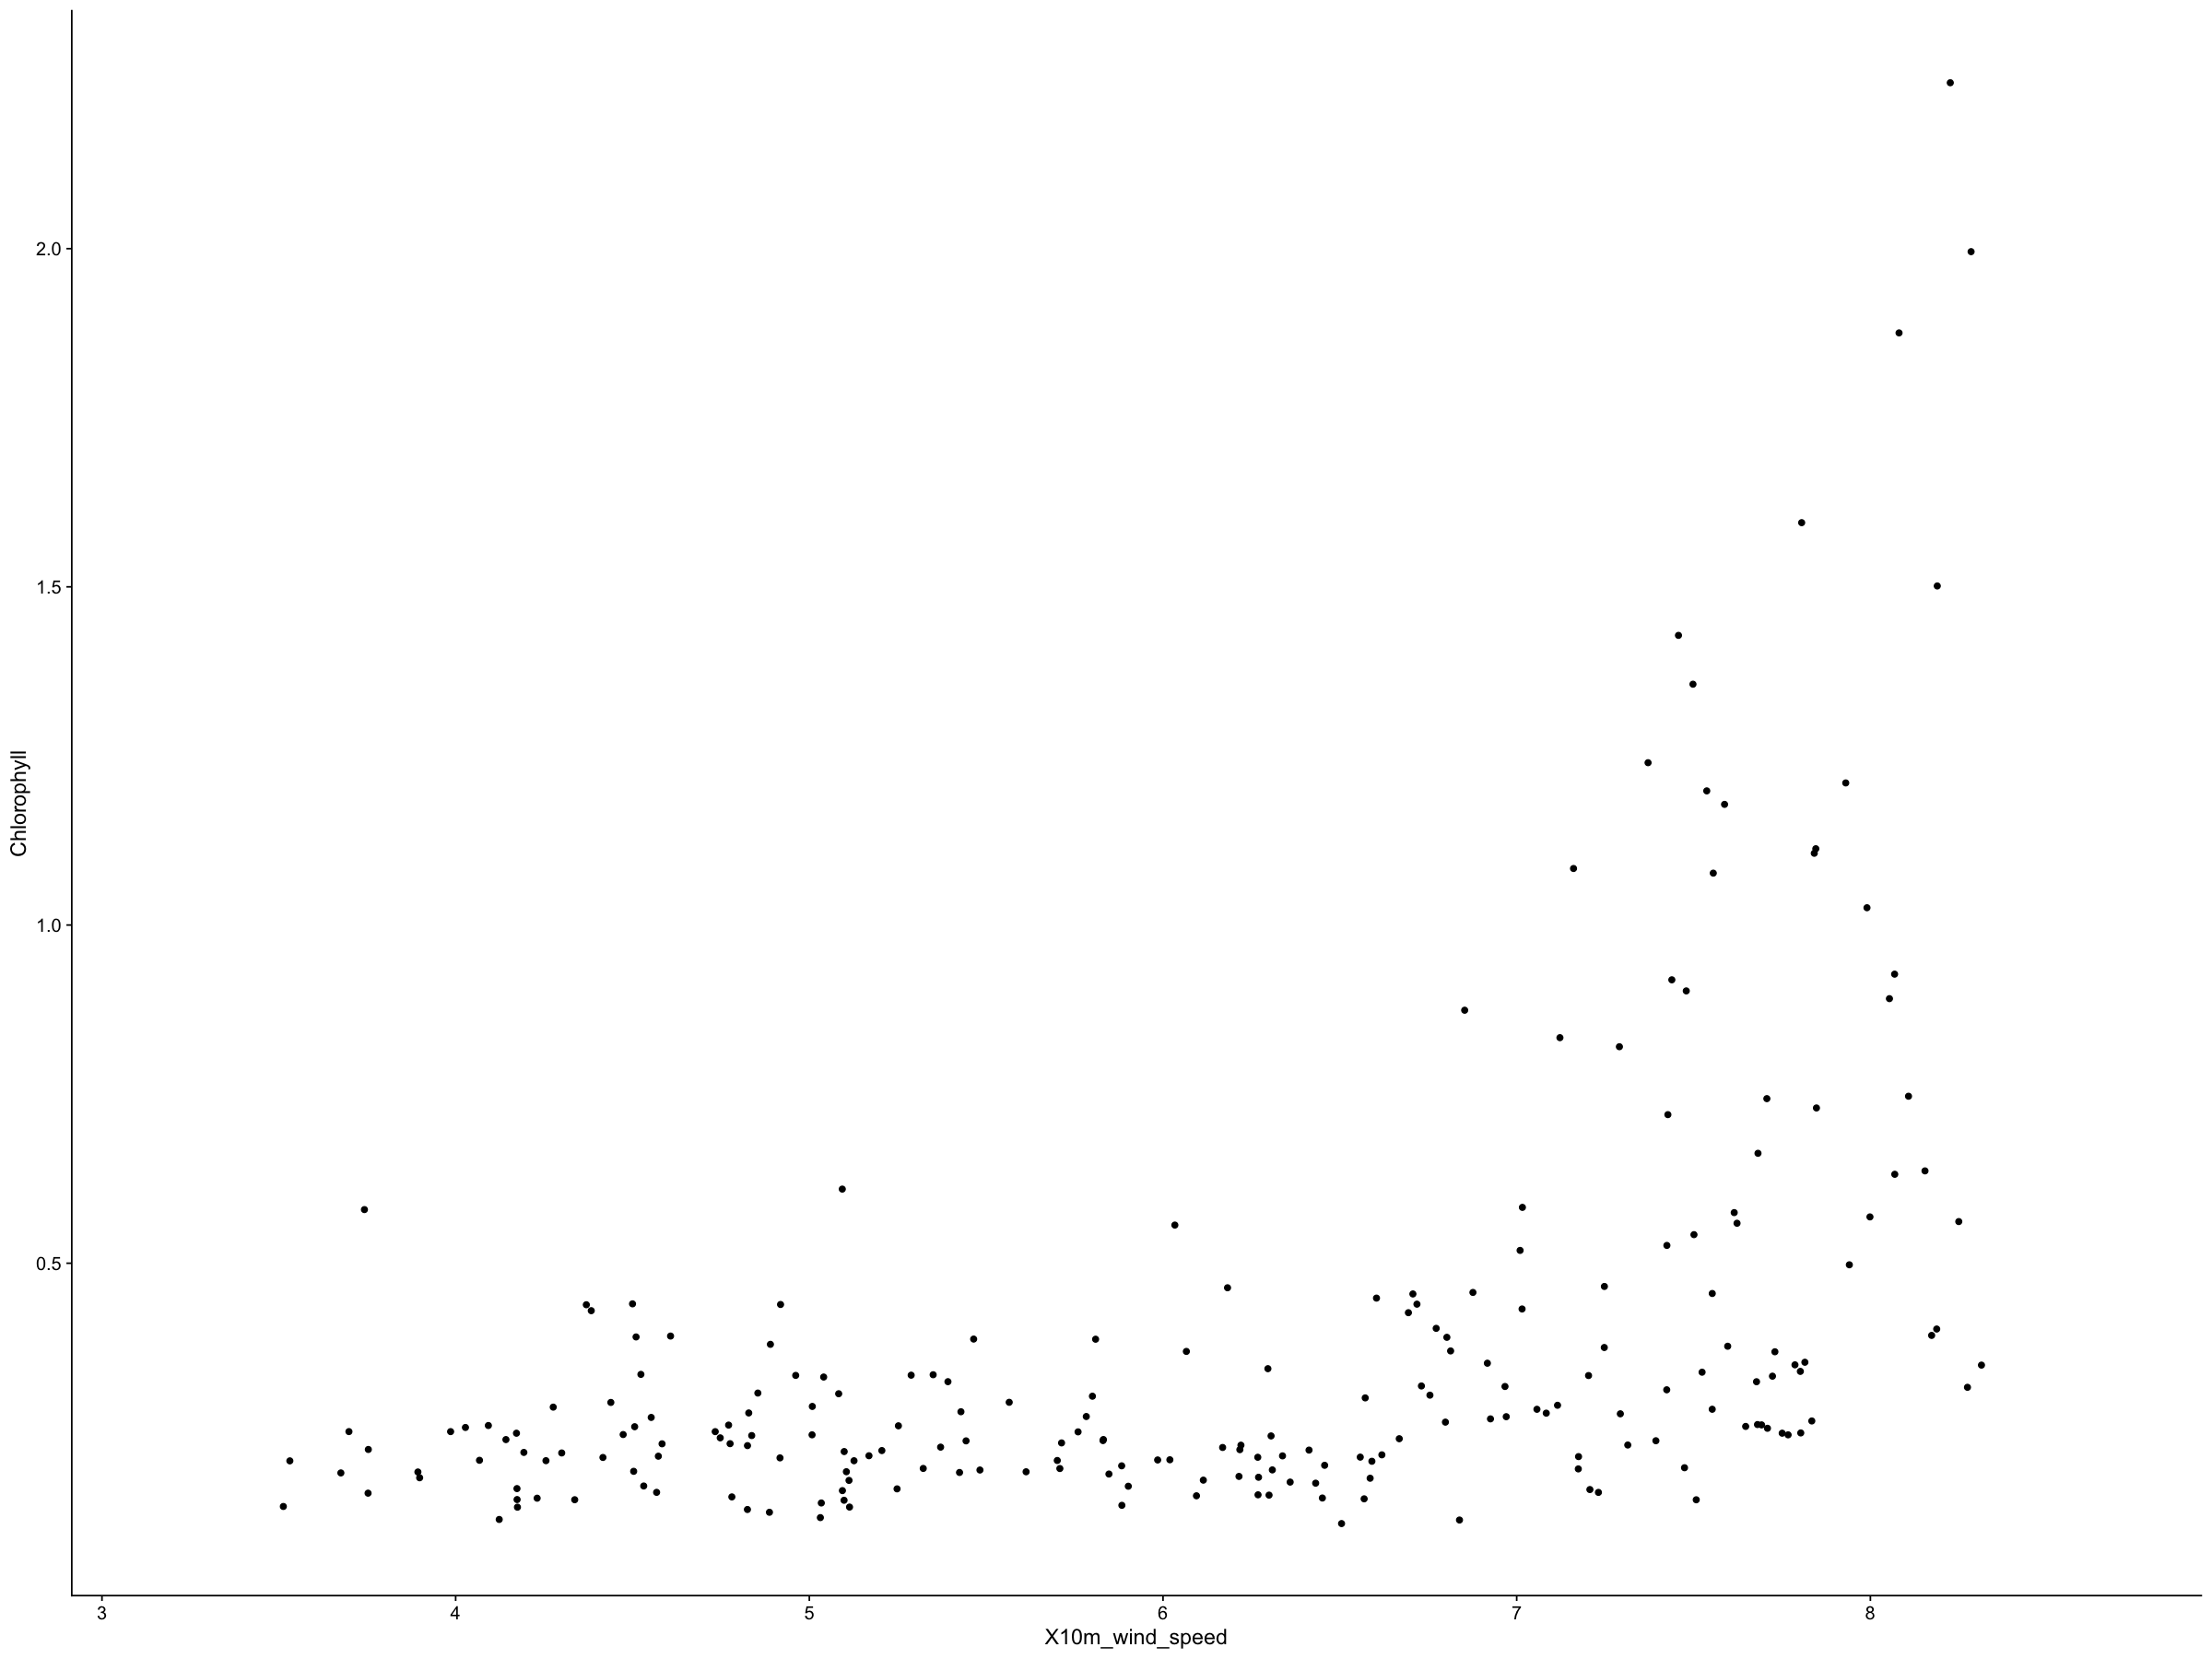

In [119]:
ggplot(data=wind_niskin, aes(x=X10m_wind_speed, y=Chlorophyll))+ geom_point() +theme_cowplot()

In [ ]:
wind_niskin

In [111]:
getdatawithniskinvar <- function(varname) {
    clean_wind = subset(wind_niskin, select = - c(X, time_month, time.x,time.y,time, runoff, mean_runoff_rate, sub_surface_runoff, surface_runoff, runoff))  
    
    colnum = which(colnames(clean_wind) == varname)
    
    return(clean_wind[c(1:26, colnum)])
}

In [122]:
correlateplotniskinwind <- function(varname) {
    var_wind = getdatawithniskinvar(varname)
    
    var_cor <- cor(var_wind[,-27], method = "pearson", use="pairwise.complete.obs")[1,]
    
    var_cor_df <- as.data.frame(var_cor, keep.rownames = TRUE)

    names(var_cor_df)[1] <- "correlation"

    var_cor_df_named <- tibble::rownames_to_column(var_cor_df, "var")
    
    options(repr.plot.width=20, repr.plot.height=15)

    limit <- max(abs(var_cor_df_named[-1,]$correlation)) * c(-1, 1)

    ggplot(data=var_cor_df_named[-1,], aes(x=var, y=correlation, fill=correlation)) + 
        geom_bar(stat="identity") + ylab(varname) +
        coord_flip() + ggtitle(paste0("Correlation: ", varname, " vs climate data")) + 
        scale_fill_distiller(type='div', limit = limit) +  theme_cowplot(font_size=30)
}

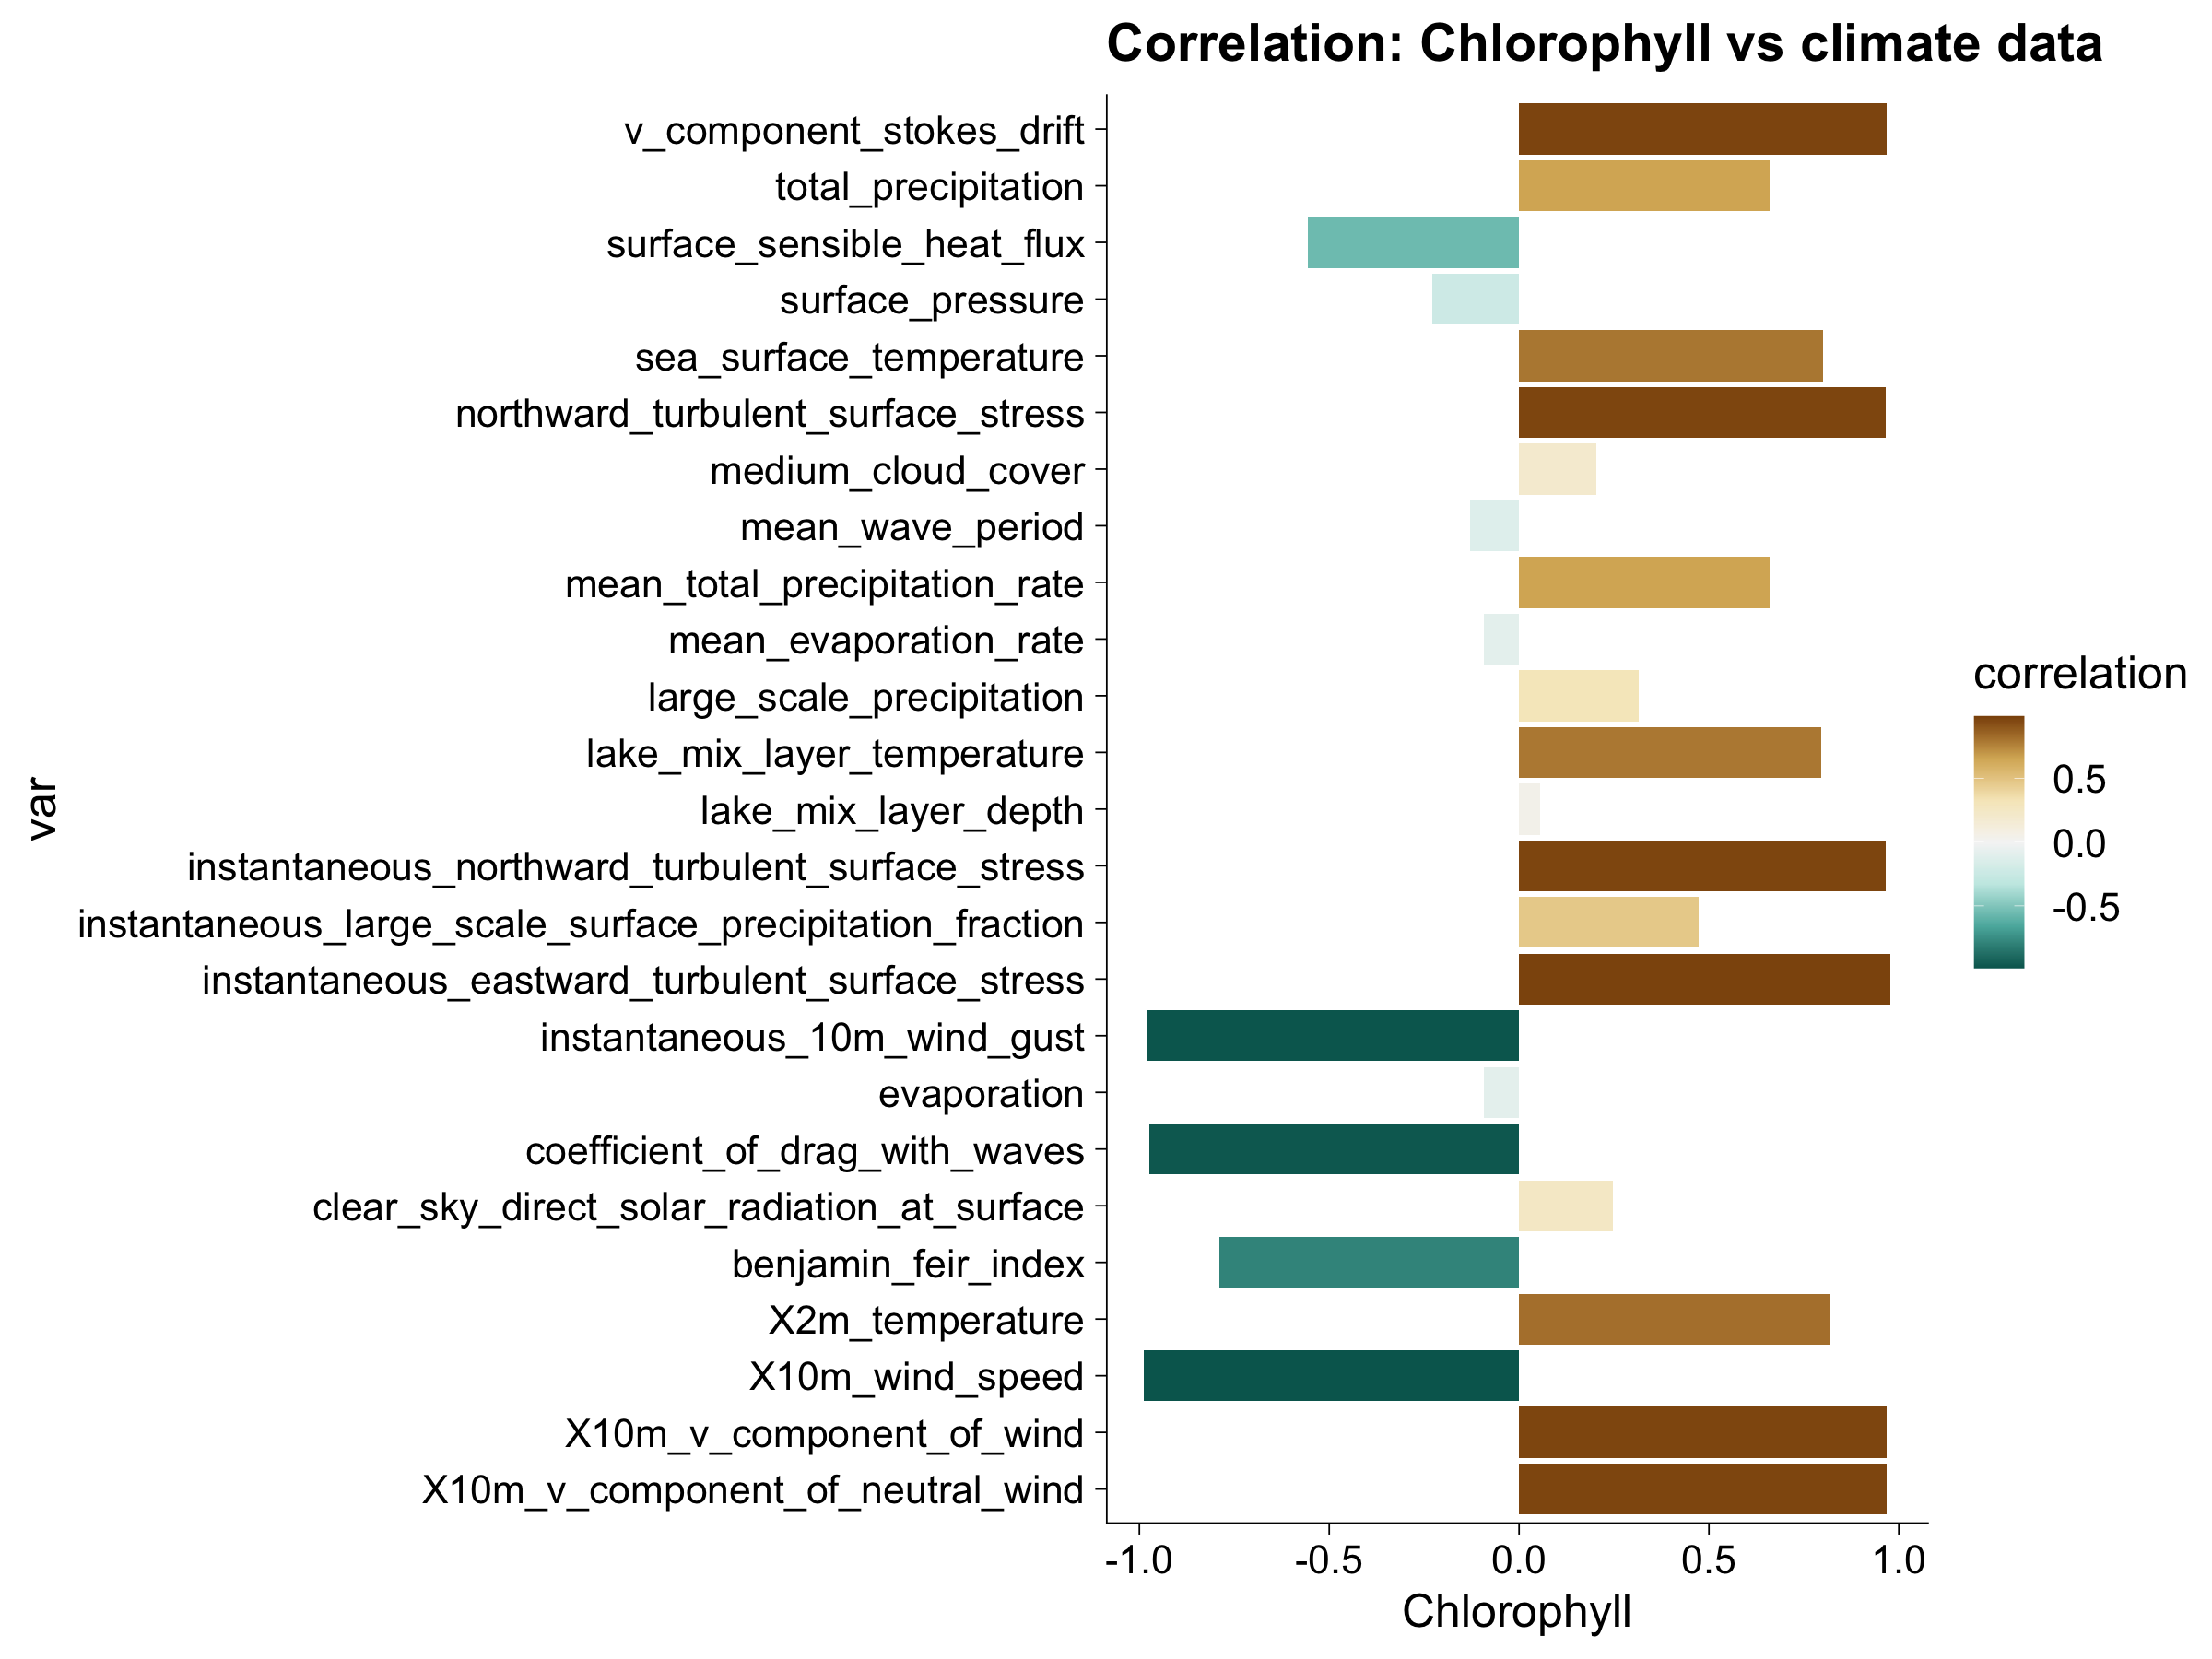

In [123]:
correlateplotniskinwind("Chlorophyll")

In [57]:
length(names(chlorophyll_wind))

[1] 31

In [59]:
chlor_cor <- cor(chlorophyll_wind[,-31], method = "pearson", use="pairwise.complete.obs")[1,]

Warning message in cor(chlorophyll_wind[, -31], method = "pearson", use = "pairwise.complete.obs"):
“Standardabweichung ist Null”


In [51]:
niskinVSu10 <- cor(ds_wind_niskin[,-1], method = "pearson", use="pairwise.complete.obs")[1,]

ERROR: Error in cor(ds_wind_niskin[, -1], method = "pearson", use = "pairwise.complete.obs"): 'x' must be numeric


In [61]:
names(chlor_cor)[1]

[1] "X10m_u_component_of_wind"

In [62]:
chlor_cor_df <- as.data.frame(chlor_cor, keep.rownames = TRUE)

names(chlor_cor_df)[1] <- "correlation"

chlor_cor_df <- tibble::rownames_to_column(chlor_cor_df, "var")


In [63]:
str(chlor_cor_df)
head(chlor_cor_df)

'data.frame':	30 obs. of  2 variables:
 $ var        : chr  "X10m_u_component_of_wind" "X10m_v_component_of_neutral_wind" "X10m_v_component_of_wind" "X10m_wind_speed" ...
 $ correlation: num  1 0.968 0.967 -0.988 0.821 ...


,var,correlation
,<chr>,<dbl>
1,X10m_u_component_of_wind,1.0000000
2,X10m_v_component_of_neutral_wind,0.9675083
3,X10m_v_component_of_wind,0.9672807
4,X10m_wind_speed,-0.9875072
5,X2m_temperature,0.8211182
6,benjamin_feir_index,-0.7884966


In [68]:
library(cowplot)

Warning message:
“Removed 4 rows containing missing values (position_stack).”


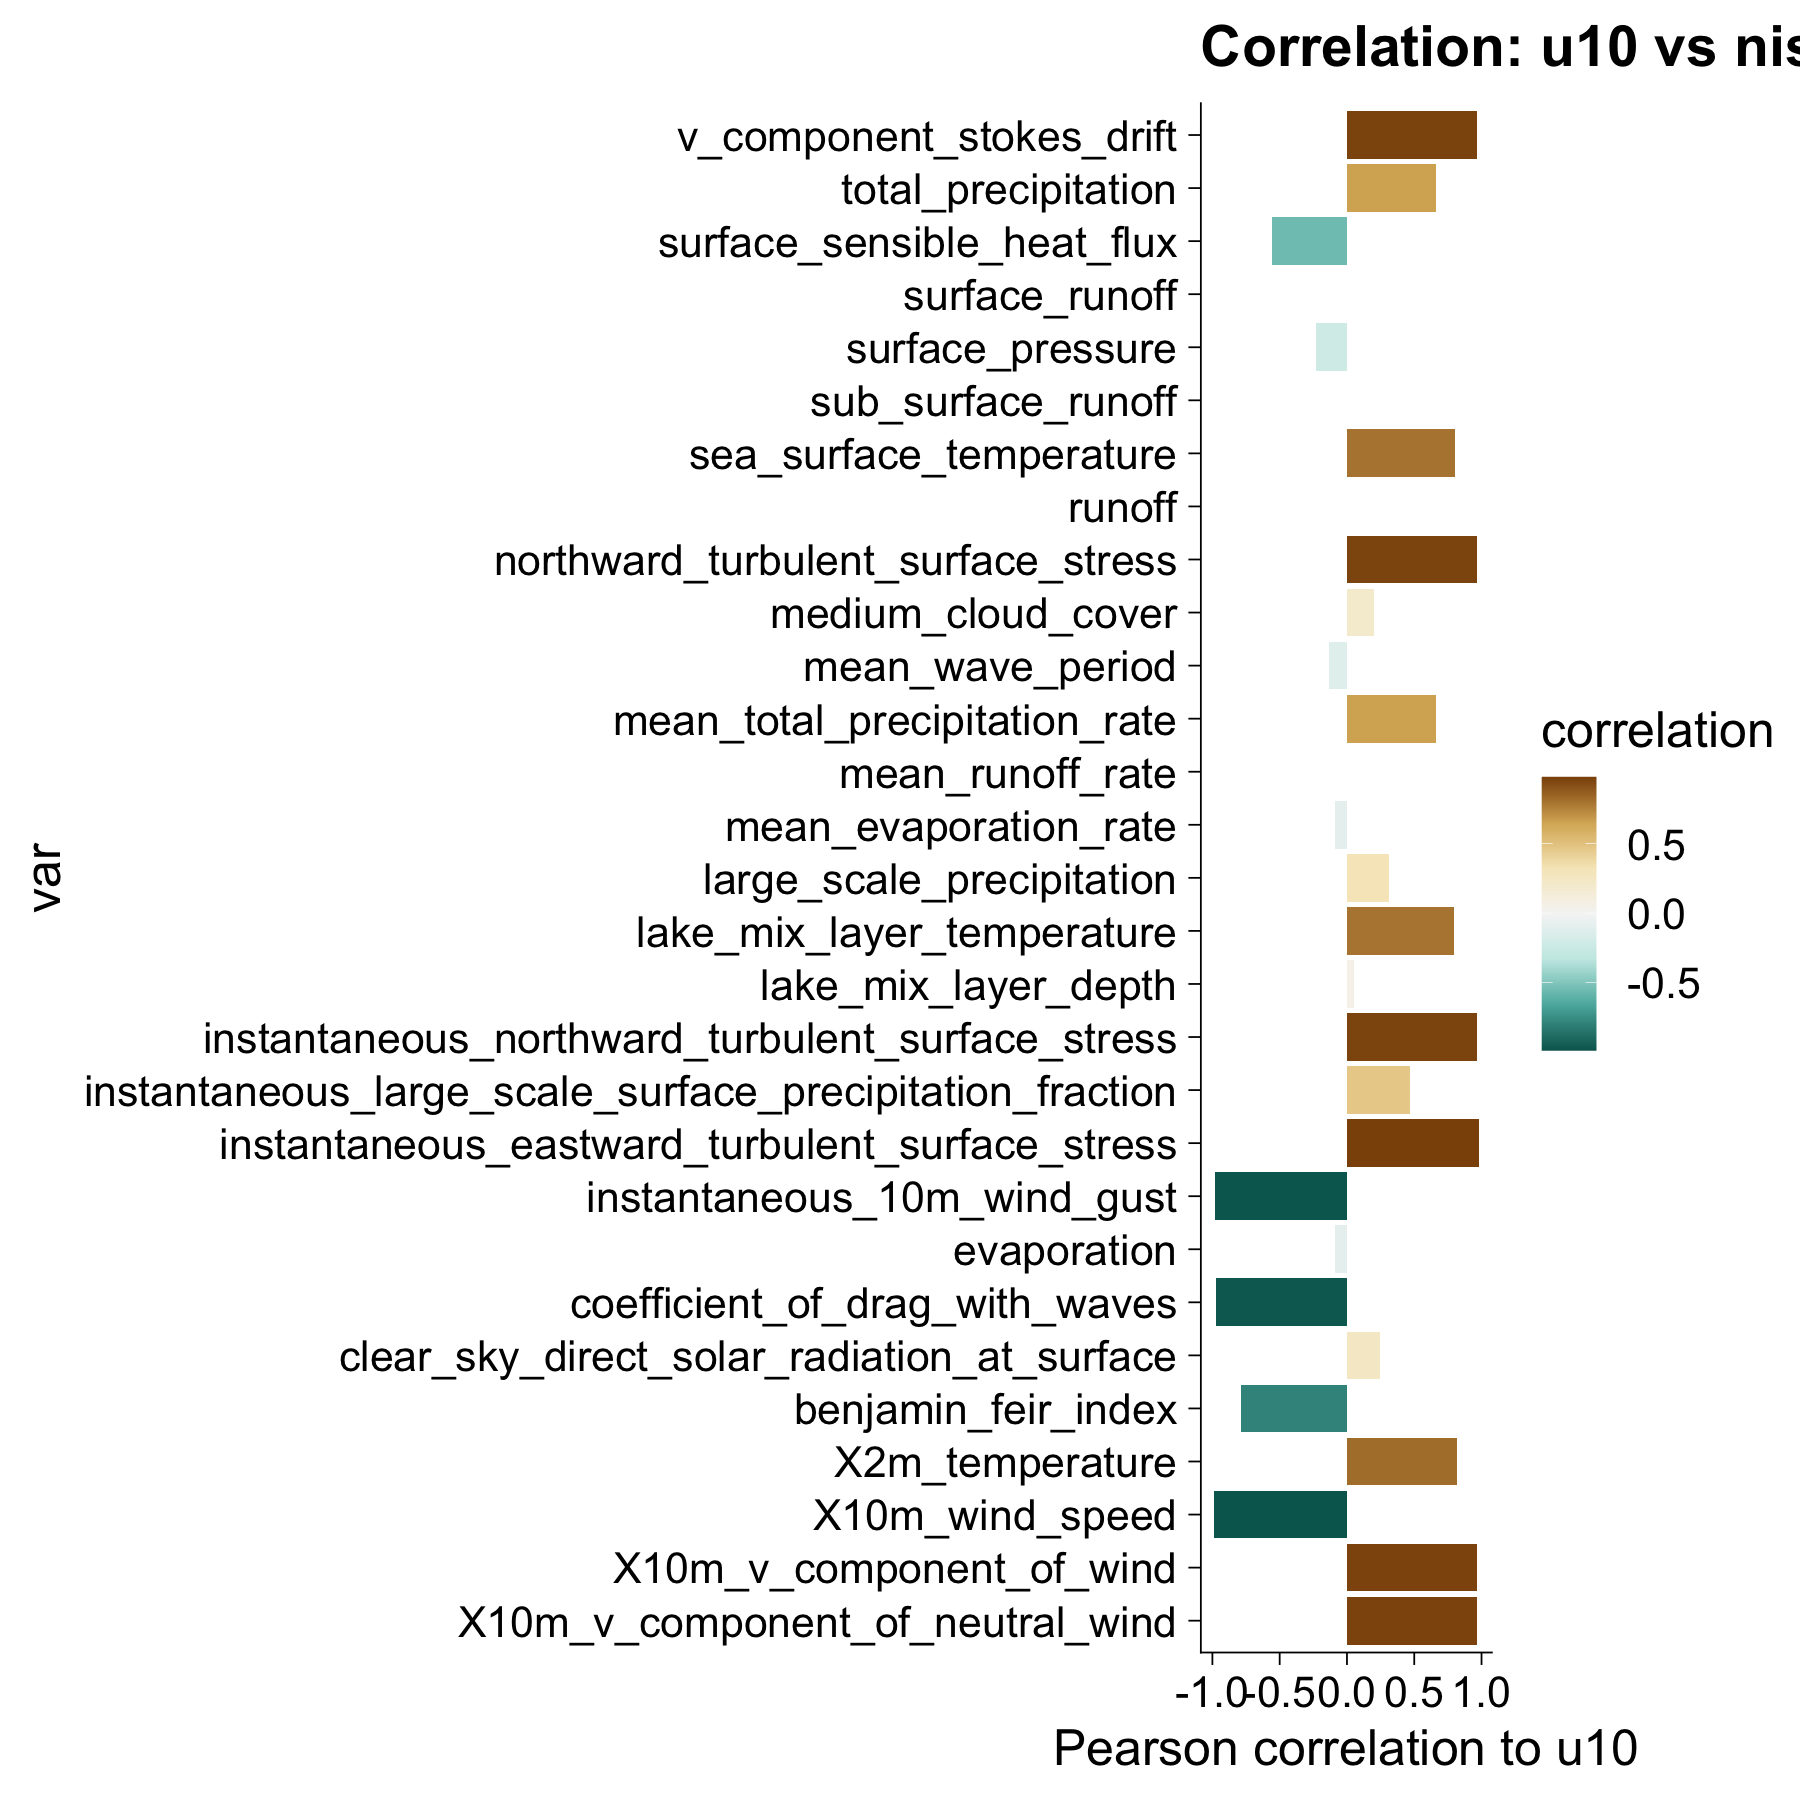

In [69]:
options(repr.plot.width=15, repr.plot.height=15)

limit <- max(abs(chlor_cor_df[-1,]$correlation)) * c(-1, 1)

ggplot(data=chlor_cor_df[-1,], aes(x=var, y=correlation, fill=correlation)) + 
    geom_bar(stat="identity") + ylab("Pearson correlation to u10") +
    coord_flip() + ggtitle("Correlation: u10 vs niskin data") + 
    scale_fill_distiller(type='div', limit = limit) +  theme_cowplot(font_size=30)